In [5]:
# import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import os

In [6]:
# IMPORT combined FILE

filepath = os.path.join("Output_Data", "combined_data_2014_2015.csv")

combined_data_df = pd.read_csv(filepath)

# PLOT stuff

In [7]:
year_2014_df = combined_data_df[combined_data_df['Year']==2014]
year_2015_df = combined_data_df[combined_data_df['Year']==2015]

rain_2015_series = year_2015_df[year_2015_df['rain_1h']>0]['Ride_count']
sunny_2015_series = year_2015_df[year_2015_df['rain_1h']==0]['Ride_count']

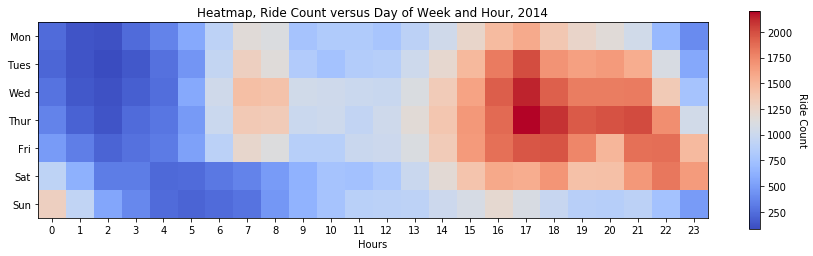

In [8]:
year_2014_df = year_2014_df[['Time', 'Day_of_week', 'Ride_count']]

heatmap_2014_df = year_2014_df.pivot_table(columns='Time', index='Day_of_week', values = 'Ride_count', aggfunc='median')

days_of_week = ['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']

hours = np.arange(0, 24)

fig, ax = plt.subplots(1,1, figsize = (15,4))

im = ax.imshow(heatmap_2014_df, cmap='coolwarm')

ax.set_xticks(np.arange(len(hours)))
ax.set_yticks(np.arange(len(days_of_week)))

ax.set_xticklabels(hours)
ax.set_yticklabels(days_of_week)

cbarlabel = "Ride Count"
cbar = ax.figure.colorbar(mappable = im, ax=ax)
cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

ax.set_title("Heatmap, Ride Count versus Day of Week and Hour, 2014")

ax.set_xlabel('Hours')

plt.savefig("Images/Heatmap_ridecount_over_day_and_hour_2014")

plt.show()

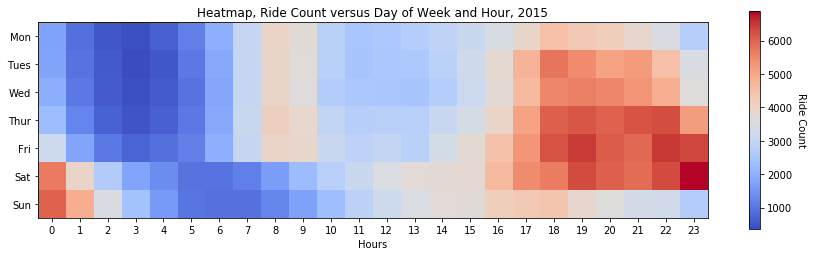

In [9]:
year_2015_df = year_2015_df[['Time', 'Day_of_week', 'Ride_count']]

heatmap_2015_df = year_2015_df.pivot_table(columns='Time', index='Day_of_week', values = 'Ride_count', aggfunc='median')

days_of_week = ['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']

hours = np.arange(0, 24)

fig, ax = plt.subplots(1,1, figsize = (15,4))

im = ax.imshow(heatmap_2015_df, cmap='coolwarm')

ax.set_xticks(np.arange(len(hours)))
ax.set_yticks(np.arange(len(days_of_week)))

ax.set_xticklabels(hours)
ax.set_yticklabels(days_of_week)

cbarlabel = "Ride Count"
cbar = ax.figure.colorbar(mappable = im, ax=ax)
cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

ax.set_title("Heatmap, Ride Count versus Day of Week and Hour, 2015")

ax.set_xlabel('Hours')

plt.savefig("Images/Heatmap_ridecount_over_day_and_hour_2015")


plt.show()

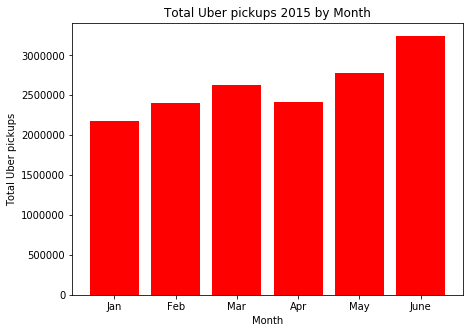

In [10]:
year_2014_df = combined_data_df[combined_data_df['Year']==2014]
year_2015_df = combined_data_df[combined_data_df['Year']==2015]

month_group_2015 = year_2015_df.groupby("Month")

month_group_2014 = year_2014_df.groupby("Month")

month_group_2015_df = month_group_2015.agg(total_ride_count = ('Ride_count', 'sum'))

month_group_2014_df = month_group_2014.agg(total_ride_count = ('Ride_count', 'sum'))

fig, ax = plt.subplots(1,1, figsize = (7,5))

months_2015 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June']
x_axis = np.arange(len(months_2015))

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]


ax.bar(x_axis, month_group_2015_df['total_ride_count'], color = 'red')

ax.set_xticks(tick_locations)
ax.set_xticklabels(months_2015)

ax.set_xlabel('Month')
ax.set_ylabel('Total Uber pickups')
ax.set_title('Total Uber pickups 2015 by Month')

plt.savefig("Images/Total_Uberpickups_by_month_2015")


plt.show()




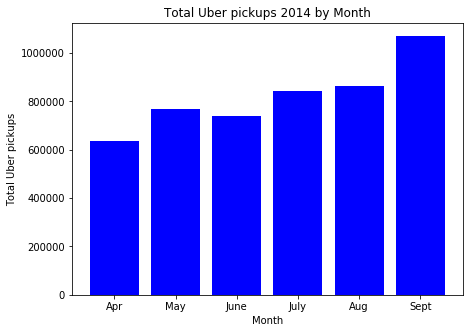

In [11]:
year_2014_df = combined_data_df[combined_data_df['Year']==2014]

month_group_2014 = year_2014_df.groupby("Month")

month_group_2014_df = month_group_2014.agg(total_ride_count = ('Ride_count', 'sum'))

fig, ax = plt.subplots(1,1, figsize = (7,5))

months_2014 = ['Apr', 'May', 'June','July', 'Aug', 'Sept']
x_axis = np.arange(len(months_2014))

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]


ax.bar(x_axis, month_group_2014_df['total_ride_count'], color = 'blue')

ax.set_xticks(tick_locations)
ax.set_xticklabels(months_2014)

ax.set_xlabel('Month')
ax.set_ylabel('Total Uber pickups')
ax.set_title('Total Uber pickups 2014 by Month')

plt.savefig("Images/Total_Uberpickups_by_month_2014")


plt.show()

### Hypothesis Testing

In [12]:
# Finding the total of rides per day across the data set.
day_totals = combined_data_df.groupby('Day_of_week')['Ride_count'].sum().tolist()

# Finding grand total of rides to find expected values.
day_totals_sum = sum(day_totals)

days_of_week = ['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']

# Values for dataframe. Will show each day, the total rides across the 2 years, and then expected total is if each day got 1/7 th of the rides, the values if the day didn't make a difference.
day_total_dict = {'Day_of_week': days_of_week, 'Total_ride_counts': day_totals, 'Expected_totals': round(day_totals_sum*(1/7))}

day_totals_df = pd.DataFrame.from_dict(day_total_dict)
day_totals_df = day_totals_df.set_index('Day_of_week')

day_totals_df.head(7)

,Total_ride_counts,Expected_totals
Day_of_week,,
Mon,2551395,2938430
Tues,2784189,2938430
Wed,2734319,2938430
Thur,3196343,2938430
Fri,3267278,2938430
Sat,3314231,2938430
Sun,2721258,2938430


In [13]:
# Finding critical value of chi-square test, alpha level 99%, degrees of freedom 1 less than the number of days in a week.
critical_value = stats.chi2.ppf(q = 0.99, df = 6)
print(f'Critical value is: {critical_value}')

# Chi squared test. 
# Null Hypothesis is that each day should have the same number of rides, that the day of the week doesn't matter. 
# We can see this in the expected values being the total divided equally.
stats.chisquare(day_totals_df['Total_ride_counts'], day_totals_df['Expected_totals'])

Critical value is: 16.811893829770927


Power_divergenceResult(statistic=196805.05218262813, pvalue=0.0)

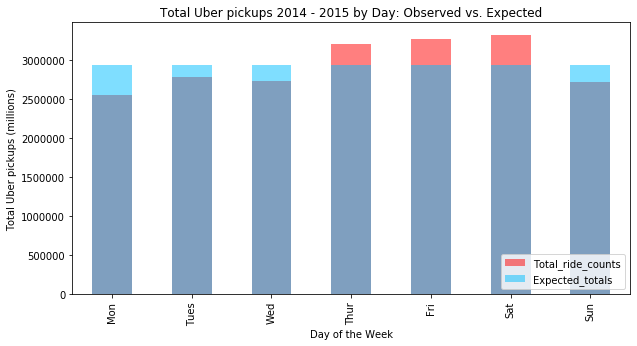

In [14]:
# Graphing the observed and expected values to look at the distributions together.
day_totals_df['Total_ride_counts'].plot(kind = 'bar',alpha = 0.50, color = 'red', figsize = (10,5))
day_totals_df['Expected_totals'].plot(kind = 'bar', alpha = 0.50, color = 'deepskyblue').legend(loc='lower right')
plt.xlabel('Day of the Week')
plt.ylabel('Total Uber pickups (millions)')
plt.title('Total Uber pickups 2014 - 2015 by Day: Observed vs. Expected')

plt.savefig("Images/Total_Uber_pickups_2014_2015_by_Day_Observed_vs_Expected")


plt.show()

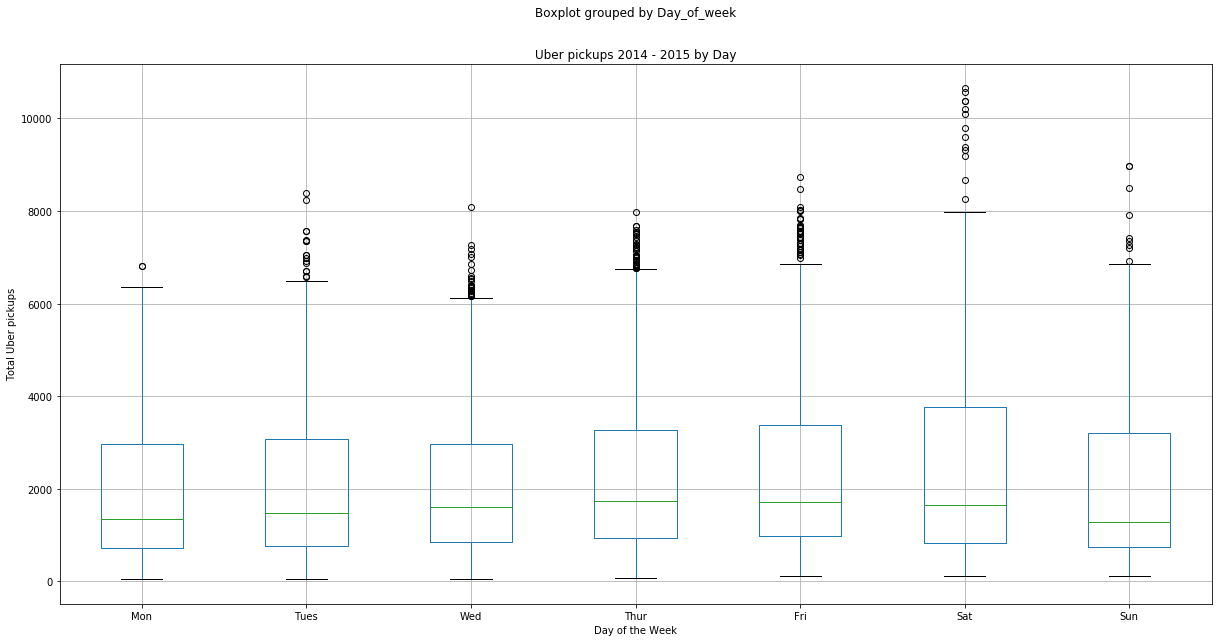

In [15]:
# Filtering to only show the day of the week and number of Uber pickups
day_groups_df = combined_data_df[['Day_of_week','Ride_count']]

# Mutiple boxplots compare distributions of Uber rides across the days of the week.
day_groups_df.boxplot('Ride_count', by = 'Day_of_week', figsize = (20,10))

# Fixing the labeling for the x-ticks, changing from the numeric placeholders to standard naming for days of the week.
plt.xticks(np.arange(1,8),days_of_week)

plt.xlabel("Day of the Week")
plt.ylabel('Total Uber pickups')
plt.title('Uber pickups 2014 - 2015 by Day')

plt.savefig("Images/Uber_pickups_2014_2015_by_Day")


plt.show()

In [16]:
# Filtering the data into days of the week groupings.
day_grp0 = combined_data_df[combined_data_df['Day_of_week']== 0]['Ride_count']
day_grp1 = combined_data_df[combined_data_df['Day_of_week']== 1]['Ride_count']
day_grp2 = combined_data_df[combined_data_df['Day_of_week']== 2]['Ride_count']
day_grp3 = combined_data_df[combined_data_df['Day_of_week']== 3]['Ride_count']
day_grp4 = combined_data_df[combined_data_df['Day_of_week']== 4]['Ride_count']
day_grp5 = combined_data_df[combined_data_df['Day_of_week']== 5]['Ride_count']
day_grp6 = combined_data_df[combined_data_df['Day_of_week']== 6]['Ride_count']

# Anova test for significance.
# Seeing if there's a significant difference between the days of the week's means.
stats.f_oneway(day_grp0, day_grp1, day_grp2, day_grp3, day_grp4, day_grp5, day_grp6)

F_onewayResult(statistic=21.457981842835235, pvalue=3.53994944299833e-25)

In [17]:
# Finding the total rides for each hour of the day across the data set.
time_totals = combined_data_df.groupby('Time')['Ride_count'].sum().tolist()

# Finding the grand sum in order to find expected values.
time_totals_sum = sum(time_totals)

# Creating the dataframe. Will show each hour of the day with it's total rides and the expected values as an equal distribution across the whole day.
time_totals_df = pd.DataFrame({'Total_ride_counts': time_totals, 'Expected_totals': round(time_totals_sum*(1/24))})
time_totals_df.index.name = 'Time of Day'

time_totals_df.head()

,Total_ride_counts,Expected_totals
Time of Day,,
0,771117,857042
1,508499,857042
2,336223,857042
3,255065,857042
4,245457,857042


In [18]:
# Finding critical value of chi-square test, alpha level 99%, degrees of freedom 1 less than the number of hours in a day.
critical_value = stats.chi2.ppf(q = 0.99, df = 23)
print(f'Critical value is: {critical_value}')

# Chi squared test. 
# Null Hypothesis is that each hour should have the same number of rides, that the hour doesn't matter. 
# We can see this in the expected values being the total divided equally.
stats.chisquare(time_totals_df['Total_ride_counts'], time_totals_df['Expected_totals'])

Critical value is: 41.638398118858476


Power_divergenceResult(statistic=3770530.1112325885, pvalue=0.0)

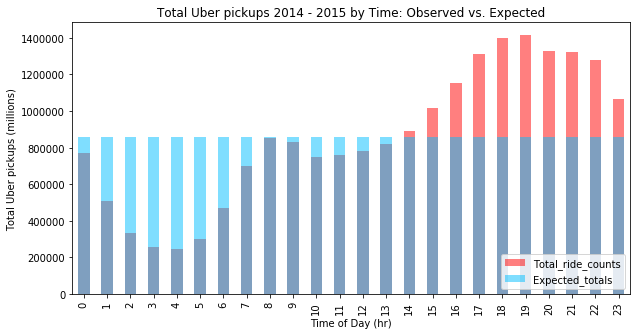

In [19]:
# Graphing the observed and expected values to look at the distributions together.
time_totals_df['Total_ride_counts'].plot(kind = 'bar',alpha = 0.50, color = 'red', )
time_totals_df['Expected_totals'].plot(kind = 'bar', alpha = 0.50, color = 'deepskyblue',figsize = (10,5)).legend(loc='lower right')
plt.xlabel('Time of Day (hr)')
plt.ylabel('Total Uber pickups (millions)')
plt.title('Total Uber pickups 2014 - 2015 by Time: Observed vs. Expected')

plt.savefig("Images/Total_Uber_pickups_2014_2015_by_Time_Observed_vs_Expected")


plt.show()

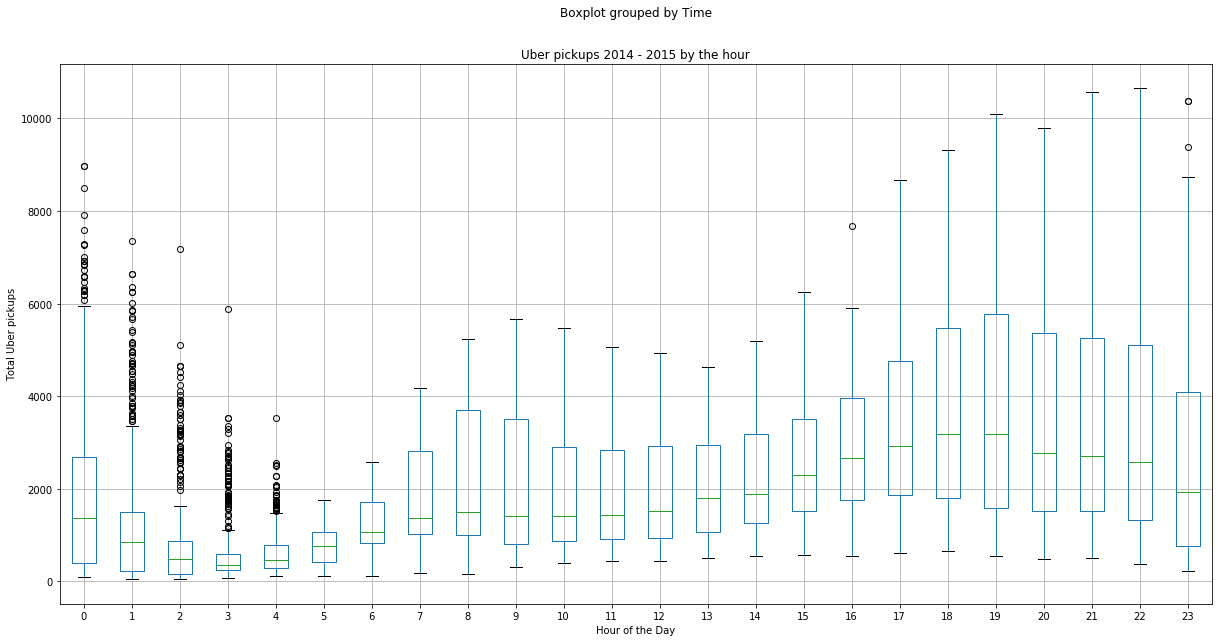

In [20]:
# Filtering to only show the hours of the day and number of Uber pickups
time_groups_df = combined_data_df[['Time','Ride_count']]

# Mutiple boxplots compare distributions of Uber rides across the hours of the day.
time_groups_df.boxplot('Ride_count', by = 'Time', figsize = (20,10))

plt.xlabel("Hour of the Day")
plt.ylabel('Total Uber pickups')
plt.title('Uber pickups 2014 - 2015 by the hour')


plt.savefig("Images/Uber_pickups_2014_2015_by_hour")

plt.show()

In [21]:
# Filtering the data into by hour groupings.
time_grp0 = combined_data_df[combined_data_df['Time']== 0]['Ride_count']
time_grp1 = combined_data_df[combined_data_df['Time']== 1]['Ride_count']
time_grp2 = combined_data_df[combined_data_df['Time']== 2]['Ride_count']
time_grp3 = combined_data_df[combined_data_df['Time']== 3]['Ride_count']
time_grp4 = combined_data_df[combined_data_df['Time']== 4]['Ride_count']
time_grp5 = combined_data_df[combined_data_df['Time']== 5]['Ride_count']
time_grp6 = combined_data_df[combined_data_df['Time']== 6]['Ride_count']
time_grp7 = combined_data_df[combined_data_df['Time']== 7]['Ride_count']
time_grp8 = combined_data_df[combined_data_df['Time']== 8]['Ride_count']
time_grp9 = combined_data_df[combined_data_df['Time']== 9]['Ride_count']
time_grp10 = combined_data_df[combined_data_df['Time']== 10]['Ride_count']
time_grp11 = combined_data_df[combined_data_df['Time']== 11]['Ride_count']
time_grp12 = combined_data_df[combined_data_df['Time']== 12]['Ride_count']
time_grp13 = combined_data_df[combined_data_df['Time']== 13]['Ride_count']
time_grp14 = combined_data_df[combined_data_df['Time']== 14]['Ride_count']
time_grp15 = combined_data_df[combined_data_df['Time']== 15]['Ride_count']
time_grp16 = combined_data_df[combined_data_df['Time']== 16]['Ride_count']
time_grp17 = combined_data_df[combined_data_df['Time']== 17]['Ride_count']
time_grp18 = combined_data_df[combined_data_df['Time']== 18]['Ride_count']
time_grp19 = combined_data_df[combined_data_df['Time']== 19]['Ride_count']
time_grp20 = combined_data_df[combined_data_df['Time']== 20]['Ride_count']
time_grp21 = combined_data_df[combined_data_df['Time']== 21]['Ride_count']
time_grp22 = combined_data_df[combined_data_df['Time']== 22]['Ride_count']
time_grp23 = combined_data_df[combined_data_df['Time']== 23]['Ride_count']

# Anova test for significance.
# Seeing if there's a significant difference between the hours of the day's means.
stats.f_oneway(time_grp0,time_grp1,time_grp2, time_grp3, time_grp4, time_grp5, time_grp6, time_grp7, time_grp8, time_grp9, time_grp10,
time_grp11,time_grp12, time_grp13, time_grp14, time_grp15, time_grp16, time_grp17, time_grp18, time_grp19, time_grp20,
time_grp21,time_grp22, time_grp23)

F_onewayResult(statistic=161.9551374010086, pvalue=0.0)

In [22]:
# Separating the dataframe by those hours that have any rain listed vs. those that do not.
# Saving the Ride_count as a series for calculations.
rain_data = combined_data_df[combined_data_df['rain_1h']>0]['Ride_count']
sunny_data = combined_data_df[combined_data_df['rain_1h']==0]['Ride_count']

# Finding the count of hours that experienced rain and no rain throughout the data set.
# These will be used to find the proportion of each, which in turn will help determine expected rides.
rain_count = rain_data.count()
sun_count = sunny_data.count()
total_count = rain_count + sun_count

# The expected Uber pickups should reflect the proportion of just rainy and sunny days if rain doesn't matter.
rain_percent = rain_count/total_count
sun_percent = sun_count/total_count

print(f'Hours of rain: {rain_count} or {round(rain_percent*100,0)}%')
print(f'Hours of no precipitation: {sun_count}, or {round(sun_percent*100,0)}%')

# Finding the number of Uber pickups for each category.
rain_total = rain_data.sum()
sun_total = sunny_data.sum()
sunrain_total = rain_total + sun_total

# Creating the dataframe. Will show the weather types and amount of uber pickups observed versus a calculated proportional expected value.
sun_rain_df = pd.DataFrame({'Weather_type': ['Rainy', 'Sunny'], 'Uber_pickup_totals': [rain_total, sun_total],'Expected_pickups':[round(sunrain_total*rain_percent), round(sunrain_total*sun_percent)]})
sun_rain_df = sun_rain_df.set_index('Weather_type')

sun_rain_df

Hours of rain: 1733 or 18.0%
Hours of no precipitation: 7772, or 82.0%


,Uber_pickup_totals,Expected_pickups
Weather_type,,
Rainy,3697997,3750247.0
Sunny,16871016,16818766.0


In [23]:
# Finding critical value of chi-square test, alpha level 99%, degrees of freedom 1 less than the weather type categories.
critical_value = stats.chi2.ppf(q = 0.99, df = 1)
print(f'Critical value is: {critical_value}')

# Chi squared test. 
# Null Hypothesis is that each day should have the same number of rides, that the type of weather experienced doesn't matter.
# We can see this in the expected ride values being the total split proportionally, reflecting the proportion of time spent rainy or sunny.
stats.chisquare(sun_rain_df['Uber_pickup_totals'], sun_rain_df['Expected_pickups'])

Critical value is: 6.6348966010212145


Power_divergenceResult(statistic=890.2911200437509, pvalue=1.2659811228889197e-195)

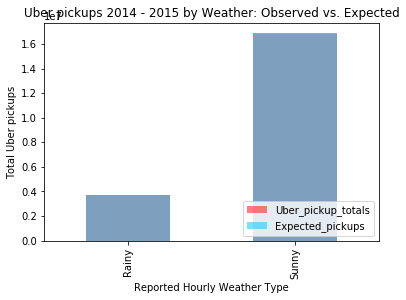

In [24]:
# Graphing the observed and expected values to look at the distributions together.
sun_rain_df['Uber_pickup_totals'].plot(kind = 'bar',alpha = 0.50, color = 'red', )
sun_rain_df['Expected_pickups'].plot(kind = 'bar', alpha = 0.50, color = 'deepskyblue').legend(loc='lower right')
plt.xlabel('Reported Hourly Weather Type')
plt.ylabel('Total Uber pickups')
plt.title('Uber pickups 2014 - 2015 by Weather: Observed vs. Expected')

plt.savefig("Images/Total_Uber_pickups_2014_2015_by_weather_Observed_vs_Expected")


plt.show()

In [25]:
# Finding the mean values for times with and without reported Rain
rain_mean = rain_data.mean()
print(f'The average number of Uber pickups when there was Rain: {rain_mean}')

sun_mean = sunny_data.mean()
print(f'The average number of Uber pickups when there was no Rain: {sun_mean}')

# Running a t-test to check significance of difference between the groups.
stats.ttest_ind(rain_data,sunny_data, equal_var=False)

The average number of Uber pickups when there was Rain: 2133.870167339873
The average number of Uber pickups when there was no Rain: 2170.743180648482


Ttest_indResult(statistic=-0.7827864572679823, pvalue=0.43382507713987606)

In [26]:
# Finding the 5-number summary for Rain data and checking for outliers.
rain_quartiles = rain_data.quantile([0.25,0.5,0.75])
rain_lowerq = rain_quartiles[0.25]
rain_upperq = rain_quartiles[0.75]
rain_iqr = rain_upperq - rain_lowerq
rain_upper_bound = rain_upperq + (1.5*rain_iqr)
rain_lower_bound = rain_lowerq - (1.5*rain_iqr)

# Finding the 5-number summary for Sunny data and checking for outliers.
sun_quartiles = sunny_data.quantile([0.25,0.5,0.75])
sun_lowerq = sun_quartiles[0.25]
sun_upperq = sun_quartiles[0.75]
sun_iqr = sun_upperq - sun_lowerq
sun_upper_bound = sun_upperq + (1.5*rain_iqr)
sun_lower_bound = sun_lowerq - (1.5*rain_iqr)

# Separating the dataframes into those that have any rain listed vs. those that do not.
rain_df = combined_data_df[combined_data_df['rain_1h']>0]
sun_df = combined_data_df[combined_data_df['rain_1h']==0]

# Using the bounds to filter out outliers of Uber ride counts.
rain_filtered = rain_df[(rain_df['Ride_count'] <= rain_upper_bound) & (rain_df['Ride_count'] >= rain_lower_bound)]
sun_filtered = sun_df[(sun_df['Ride_count'] <= sun_upper_bound) & (sun_df['Ride_count'] >= sun_lower_bound)]


In [27]:
# This is all just modified to include the filtered data.

# Separating the dataframe by those hours that have any rain listed vs. those that do not.
# Saving the Ride_count as a series for calculations.
rain_filtered_data = rain_filtered['Ride_count']
sun_filtered_data = sun_filtered['Ride_count']

# Finding the count of hours that experienced rain and no rain throughout the data set.
# These will be used to find the proportion of each, which in turn will help determine expected rides.
rain_filtered_count = rain_filtered_data.count()
sun_filtered_count = sun_filtered_data.count()
total_filtered_count = rain_filtered_count + sun_filtered_count

# The expected Uber pickups should reflect the proportion of just rainy and sunny days if rain doesn't matter.
rain_filtered_percent = rain_filtered_count/total_filtered_count
sun_filtered_percent = sun_filtered_count/total_filtered_count

print(f'Hours of rain: {rain_filtered_count} or {round(rain_filtered_percent*100,0)}%')
print(f'Hours of no precipitation: {sun_filtered_count}, or {round(sun_filtered_percent*100,0)}%')

# Finding the number of Uber pickups for each category.
rain_filtered_total = rain_filtered_data.sum()
sun_filtered_total = sun_filtered_data.sum()
sunrain_filtered_total = rain_filtered_total + sun_filtered_total

# Creating the dataframe. Will show the weather types and amount of uber pickups observed versus a calculated proportional expected value.
sr_filtered_df = pd.DataFrame({'Weather_type': ['Rainy', 'Sunny'], 'Uber_pickup_totals': [rain_filtered_total, sun_filtered_total],'Expected_pickups':[round(sunrain_filtered_total*rain_filtered_percent), round(sunrain_filtered_total*sun_filtered_percent)]})
sr_filtered_df = sr_filtered_df.set_index('Weather_type')

sr_filtered_df

Hours of rain: 1712 or 18.0%
Hours of no precipitation: 7626, or 82.0%


,Uber_pickup_totals,Expected_pickups
Weather_type,,
Rainy,3519964,3540273.0
Sunny,15790239,15769930.0


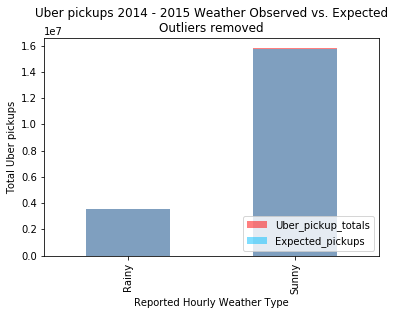

In [28]:
# Graphing the observed and expected values to look at the distributions together.
sr_filtered_df['Uber_pickup_totals'].plot(kind = 'bar',alpha = 0.50, color = 'red', )
sr_filtered_df['Expected_pickups'].plot(kind = 'bar', alpha = 0.50, color = 'deepskyblue').legend(loc='lower right')
plt.xlabel('Reported Hourly Weather Type')
plt.ylabel('Total Uber pickups')
plt.title('''Uber pickups 2014 - 2015 Weather Observed vs. Expected
Outliers removed''')

plt.savefig("Images/Total_Uber_pickups_2014_2015_by_weather_Observed_vs_Expected_no_outliers")


plt.show()

In [29]:
# function to easily plot scatter plots with linear regression. 

def plt_scat(x_vals, y_vals, xlabel, ylabel, title):
    fig, ax = plt.subplots(1,1,figsize=(7,5))

    slope, intercept, r_val, p_val, std_err = stats.linregress(x_vals, y_vals)
    corr = stats.pearsonr(x_vals, y_vals)[0]
    
    y_fit = slope * x_vals + intercept
    y_fit_label = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    
    ax.scatter(x=x_vals, y=y_vals, s=30, edgecolors='black', alpha=1)
    ax.plot(x_vals, y_fit, linestyle="--", color = 'red', alpha = 0.5, label =y_fit_label)
    
    ax.set_xlim(min(x_vals)-2, max(x_vals)+2)
    ax.set_ylim(min(y_vals)-2, max(y_vals)+2)
    
    ax.legend(loc='best', fontsize = 12)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(f"{title}")

    ax.grid(alpha = 0.5)

    print(f"The r-value is: {corr}")

    plt.show()

The r-value is: 0.05260516589004086


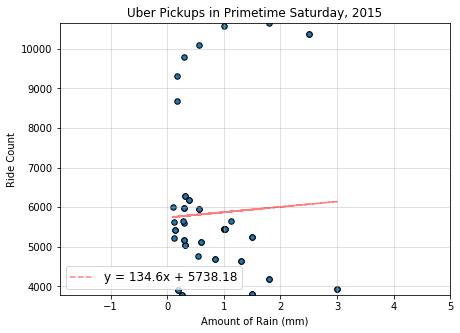

<Figure size 432x288 with 0 Axes>

In [34]:
year_2015_df = combined_data_df[combined_data_df['Year']==2015]

sat_2015_primetime_rain_df = year_2015_df[(year_2015_df['rain_1h']>0)&
                                          (year_2015_df['Time']>=16)&
                                          (year_2015_df['Day_of_week']==5)]

plt_scat(sat_2015_primetime_rain_df['rain_1h'], sat_2015_primetime_rain_df['Ride_count'], "Amount of Rain (mm)", 'Ride Count', 'Uber Pickups in Primetime Saturday, 2015')

sat_2015_primetime_rain_df.describe()

plt.savefig("Images/Uber_pickups_vs_rain_amount_primetimeSaturday_2015")